In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ccaModels import CCA_MarkovChain_CUBIC_OG, CCA_MarkovChain_Hybla_discrete, CCA_MarkovChain_Hybla, CCA_MarkovChain_CUBIC_new

#plt.rcParams['text.usetex'] = True
plt.rcParams.update(plt.rcParamsDefault)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


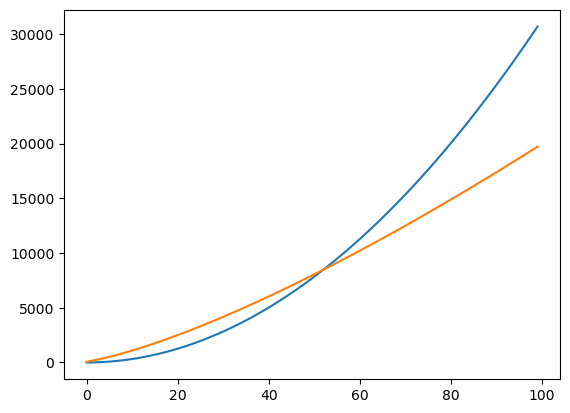

In [9]:
hyb = CCA_MarkovChain_Hybla_discrete(packet_err=0.0006,beta=0.5,N=100,C =1000, RTT_est=0.2, RTT_real = 0.5, RTT0=0.1)
cub = CCA_MarkovChain_CUBIC_new(packet_err = 0.0006, beta=0.5,N=100,C =1000, RTT_est=0., RTT_real = 0.5,alpha=0.001)

a = 1
d = np.zeros(100)
dc = np.zeros(100)
for i,ai in enumerate(hyb.a):
    d[i] = hyb.D(1,ai)
for i,ai in enumerate(cub.a):
    dc[i] = cub.D(2,ai)
plt.plot(d) 
plt.plot(dc)             

#print(hyb.D(hyb.a[int(a/2)],hyb.a[b]), cub.D(cub.a[a],cub.a[b]))

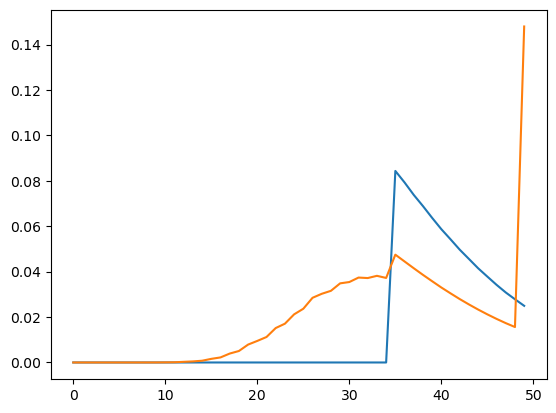

11.919134226557368
[[0.03 0.23 0.43 ... 9.43 9.63 9.83]
 [0.   0.09 0.29 ... 9.29 9.49 9.69]
 [0.   0.   0.15 ... 9.15 9.35 9.55]
 ...
 [0.   0.   0.   ... 2.85 3.05 3.25]
 [0.   0.   0.   ... 2.71 2.91 3.11]
 [0.   0.   0.   ... 2.57 2.77 2.97]]


In [4]:
hyb = CCA_MarkovChain_Hybla_discrete(packet_err=0.0006,beta=0.7,N=50,C =1000, RTT_est=0.2, RTT_real = 0.21, RTT0=0.1)

#for b in np.arange(2,20,2):
#    print(hyb.D(hyb.a[1], (b-1)*hyb.W/hyb.N))
#    print(hyb.D(hyb.a[1], hyb.a[b]))
#    print(hyb.D(hyb.a[1], b*hyb.W/hyb.N))
#    print("----")
tp = np.zeros(hyb.N)
for j,_ in enumerate(tp):
    tp[j] = hyb.transition_proba_Hybla(49,j)
plt.plot(tp)
hyb.compute_stationnary_distribution()
plt.plot(hyb.pi)
plt.show()
print(hyb.avg_throughput()/hyb.W)
print(hyb.tau)

In [19]:
print(hyb.a[1],hyb.a[4])
print(hyb.a[2]-0.5*hyb.a[5])
print(hyb.T(hyb.a[1],hyb.a[5]))
#self.RTT0**2*(y-self.beta*x)/self.RTT_real
(5-0.5)*hyb.W/hyb.N

15.75 47.25
-2.625
0.05250000000000008


47.25

3.621964664966512
6.020404329078785


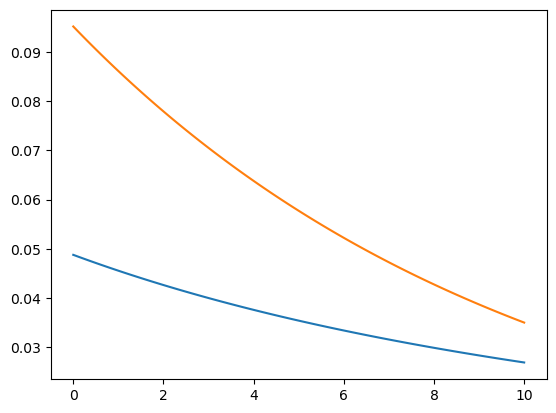

In [23]:
t = np.linspace(0,10,100)
w0 = 100
rtt = 0.5
l = 1/10
e = 0.1
w = w0+t/rtt # cwnd in MSS
b = w/rtt # MSS/s

p = np.exp(-t/(e*b))-np.exp(-(t+1)/(e*b))
pold = np.exp(-l*t)-np.exp(-l*(t+1))

plt.plot(t,p)
plt.plot(t,pold)
print(np.sum(np.exp(-t/(e*b))-np.exp(-(t+1)/(e*b))))
print(np.sum(np.exp(-l*t)-np.exp(-l*(t+1))))

In [1]:
def P(t, eps):
    return (1-eps)**(t-1)*eps

P(1,0.1)+P(2,0.1)

0.19

In [6]:
sum = 0
for i in [1,2,3,4]:
    sum+= P(i,0.1)

print(sum)

0.34390000000000004


In [10]:
import numpy as np
import scipy

P = [[0.19,0.15,0.66],[0.271,0.1385,0.599],[0,0.344,0.656]]

ws,vs = scipy.sparse.linalg.eigs(A=np.transpose(P),k=1,sigma=1)
pi = np.real(vs/vs.sum())[:,0]

print(pi)
print(np.sum(pi))

[0.09018778 0.27032966 0.63948256]
1.0


In [2]:
1/np.arange(10)

/tmp/ipykernel_25408/4242892561.py:1: RuntimeWarning: divide by zero encountered in divide
  1/np.arange(10)


array([       inf, 1.        , 0.5       , 0.33333333, 0.25      ,
       0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111])

In [8]:
def wc(t):
    return (t-np.cbrt(100*0.3))**3+100

def w_next(w,rtt,t):
    return w+(wc(t+rtt)-w)/w

In [15]:
rtt = 0.1
c = 70
for i in range(70):
    c = w_next(c,rtt,rtt+i*rtt)
    if i%10==0:
        print(c)
print(c)
print(wc(rtt))

70.07754383438456
72.24928012790619
75.43804769716698
78.43866153992114
81.05014108817197
83.7968869647492
87.73479597878843
93.42292949741868
72.80425117863827
